

# <h1><center><font color='teal'>Document Clustering with TF or TF-IDF vectorization</font> </center></h1>

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as stm
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal

import warnings
warnings.filterwarnings('ignore')

In [2]:
#for fitting LinearRegression
from sklearn.linear_model import LinearRegression

#for fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#to compute cross validation score
from sklearn.model_selection import cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Splitting the Dataset
from sklearn.model_selection import train_test_split

# Model
from sklearn.decomposition import PCA

# Scoring Metrics
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
import nltk

### Documents

In [5]:
#pip install wikipedia 

In [6]:
import wikipedia

In [7]:
#Getting the wikipedia pages for cricketers

sachin=wikipedia.page("Sachin_Tendulkar").content
dhoni=wikipedia.page("Mahendra Singh Dhoni").content
kohli=wikipedia.page("Virat_Kohli").content
ganguli=wikipedia.page("Sourav_Ganguly").content
dravid=wikipedia.page("Rahul_Dravid").content
rohit=wikipedia.page("Rohit_Sharma").content
dinda=wikipedia.page("Ashok_Dinda").content
yuvraj=wikipedia.page("Yuvraj_Singh").content
sehwag=wikipedia.page("Virender_Sehwag").content
gambhir=wikipedia.page("Gautam_Gambhir").content

In [8]:
#Getting the wikipedia pages for Footballers

messi = wikipedia.page("LionelMessi").content
ronaldo = wikipedia.page("Cristiano_Ronaldo").content
neymar = wikipedia.page("Neymar da Silva Santos Júnior").content
kaka = wikipedia.page("Ricardo Izecson dos Santos Leite").content
ronaldinho = wikipedia.page("Ronaldinho").content
sunil = wikipedia.page("Sunil_Chhetri").content
rooney = wikipedia.page("Wayne Mark Rooney").content
zidane = wikipedia.page("Zinedine_Zidane").content
martinez = wikipedia.page("Emiliano_Martínez").content
pele = wikipedia.page("Pelé").content

### Final Data

In [9]:
#creating Dictinory
dic = {'documents':[sachin,dhoni,kohli,ganguli,dravid,rohit,dinda,yuvraj,sehwag,gambhir,messi,ronaldo,neymar,kaka,
                    ronaldinho,sunil,rooney,zidane,martinez,pele],
       'label':['Cricketer','Cricketer','Cricketer','Cricketer','Cricketer','Cricketer','Cricketer','Cricketer','Cricketer',
                'Cricketer','Footballer','Footballer','Footballer','Footballer','Footballer','Footballer','Footballer',
                'Footballer','Footballer','Footballer'],
       'length':[len(sachin.split()),len(dhoni.split()),len(kohli.split()),len(ganguli.split()),len(dravid.split()),
                 len(rohit.split()),len(dinda.split()),len(yuvraj.split()),len(sehwag.split()),len(gambhir.split()),
                len(messi.split()),len(ronaldo.split()),len(neymar.split()),len(kaka.split()),len(ronaldinho.split()),
                len(sunil.split()),len(rooney.split()),len(zidane.split()),len(martinez.split()),len(pele.split())]}


In [10]:
data = pd.DataFrame(dic)
data

,documents,label,length
0,Sachin Ramesh Tendulkar BR ( (listen); pronoun...,Cricketer,11959
1,Mahendra Singh Dhoni ( (listen); born 7 July 1...,Cricketer,6162
2,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,Cricketer,13048
3,Sourav Chandidas Ganguly ( (listen); natively ...,Cricketer,5958
4,Rahul Sharad Dravid ( (listen); born 11 Januar...,Cricketer,10026
5,Rohit Gurunath Sharma (born 30 April 1987) is ...,Cricketer,3595
6,Ashok Dinda (born 25 March 1984) is a former ...,Cricketer,354
7,Yuvraj Singh (born 12 December 1981) is a form...,Cricketer,7236
8,Virender Sehwag pronunciation (born 20 Octobe...,Cricketer,6030
9,Gautam Gambhir (pronunciation ; born 14 Octobe...,Cricketer,2674


### Test Pre-processing

In [11]:
#1. Converting the text into lower cases
for i in range(len(data.documents)):
    data.documents[i] = data.documents[i].lower()
#---------------------------------------------------------------------------------------------------

#2. Remove stopwords (and the word "apple")
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
#---------------------------------------------------------------------------------------------------

#Removing stopwords from all the tweets
for i in range(len(data.documents)):
    data.documents[i] = " ".join([w for w in data.documents[i].split() if w not in stop_words])
#---------------------------------------------------------------------------------------------------

#3. Remove Punctuations/special symbols and 
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

#Removing punctuation from all the tweets
for i in range(len(data.documents)):
    data.documents[i] = data.documents[i].translate(remv_punc)
#---------------------------------------------------------------------------------------------------

#4. Remove white spaces
for i in range(len(data.documents)):
    data.documents[i] = data.documents[i].replace("  ", " ").strip()
#---------------------------------------------------------------------------------------------------

#5. Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for i in range(len(data.documents)):
    data.documents[i] = " ".join([ps.stem(w) for w in data.documents[i].split()])

data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,documents,label,length
0,sachin ramesh tendulkar br listen pronounc sət...,Cricketer,11959
1,mahendra singh dhoni listen born 7 juli 1981 i...,Cricketer,6162
2,virat kohli hindi pronunci ʋɪˈɾɑːʈ ˈkoːɦli lis...,Cricketer,13048
3,sourav chandida ganguli listen nativ spell gan...,Cricketer,5958
4,rahul sharad dravid listen born 11 januari 197...,Cricketer,10026


### Data Preparation

### 1. Get the Bag-Of-Words (BOW) Dataframe with TF-IDF vectorizor

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(data.documents)

names = tfidf_vectorizer.get_feature_names()

tfidf_vectors = tfidf_vectors.toarray()
tfidf_vectors = pd.DataFrame(tfidf_vectors, columns=names)

In [13]:
tfidf_vectors

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002871,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.004252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.002091,0.000000,0.000000,0.000000,0.002091,0.000000,0.001972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003794,0.003794,0.000000,0.000000,0.000000
3,0.00923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.007998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061286,0.000000,0.061286,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.007129,0.007129,0.004954,0.000000,0.000000,0.000000,0.000000,0.000000,0.004671,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 2. Dimension Reduction

In [14]:
#using count vectoroizer to create a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X  = cv.fit_transform(data.documents).toarray()

#Document-Term Matrix
tf_vectors = pd.DataFrame(X, columns=cv.get_feature_names())

#Remove terms that is contained in less than 0.5% of the documents
for col in list(tf_vectors):
    prop = tf_vectors[col].sum()/tf_vectors.shape[0]
    if prop*100 < 1:
        tf_vectors = tf_vectors.drop([col], axis=1)

print(tf_vectors.shape)

selected_variables = list(tf_vectors)

(20, 9845)


In [15]:
len(selected_variables)

9845

### 3. Scaling the data

In [16]:
#Importing the library
from sklearn import preprocessing

#Passing the values of the dataset to Min-Max-Scaler
tfidf_vectors_values = tfidf_vectors.values
min_max_scaler = preprocessing.MinMaxScaler()
tfidf_vectors_scaled = min_max_scaler.fit_transform(tfidf_vectors_values)
tfidf_vectors_scaled = pd.DataFrame(tfidf_vectors_scaled,
columns=tfidf_vectors.columns)

In [17]:
tfidf_vectors_scaled

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.210216,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.479643,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.235904,0.0,0.0,0.0,0.153158,0.0,0.122526,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.298069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.470195,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.419087,0.419087,0.558783,0.0,0.0,0.0,0.000000,0.0,0.290227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Fitting Heirarchial Clustering and PCA on Scaled data & Unscaled data

#### A. Euclidiean Distance with Single Linkage

In [18]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [19]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='Euclidean', linkage='single')

In [20]:
hclust.fit(tfidf_vectors_scaled)

AgglomerativeClustering(affinity='Euclidean', linkage='single')

In [21]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
Z = linkage(tfidf_vectors_scaled, 'single')

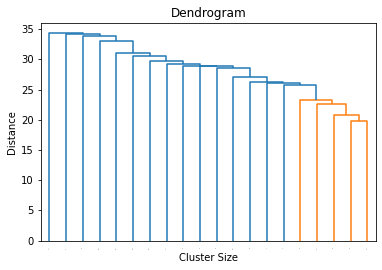

In [24]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### Dimension Reduction using PCA 

In [25]:
# Calculating variance
np.sum(tfidf_vectors.var(ddof=1))

0.7710633584492962

In [26]:
# Making an object for Principal Component Analysis
pca_tfidf = PCA()

In [27]:
# Fit_Transform scaled data created before by PCA
tfidf_scaled_pc = pca_tfidf.fit_transform(tfidf_vectors)

In [28]:
# Calculating the Variation
var_tfidf = pca_tfidf.explained_variance_ratio_ * 100
var_tfidf = pd.DataFrame(var_tfidf, index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11',
                                           'pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20'])
var_tfidf

,0
pca1,1.937661e+01
pca2,7.731649e+00
pca3,6.154862e+00
pca4,6.008165e+00
pca5,5.354352e+00
pca6,5.275308e+00
pca7,5.070513e+00
pca8,4.695262e+00
pca9,4.657410e+00
pca10,4.623168e+00


In [29]:
variance_tfidf = pca_tfidf.explained_variance_
variance_tfidf = pd.DataFrame(variance_tfidf, index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9',
                                                     'pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17',
                                                     'pca18','pca19','pca20'])
variance_tfidf

,0
pca1,1.494059e-01
pca2,5.961591e-02
pca3,4.745789e-02
pca4,4.632676e-02
pca5,4.128545e-02
pca6,4.067596e-02
pca7,3.909687e-02
pca8,3.620345e-02
pca9,3.591158e-02
pca10,3.564756e-02


#### Dimension Reduction using PCA on unscaled data

In [30]:
pca1 = PCA()
pca_df = pca1.fit_transform(tfidf_vectors)
pca_df

array([[ 4.32175908e-01, -8.90185552e-02, -1.00397057e-02,
        -1.71603968e-02, -9.84727866e-04,  3.39897798e-03,
         2.02583106e-02, -1.14698244e-01, -6.50224224e-02,
         5.05172933e-02, -2.99990148e-02, -1.73875409e-01,
        -3.05767509e-02, -6.84467408e-02, -3.84577235e-01,
        -2.48598189e-02,  5.43968670e-02, -2.69179066e-01,
        -3.35796367e-01,  1.28874004e-16],
       [ 3.67183712e-01,  4.58343146e-03,  2.12629012e-02,
        -4.04156339e-03,  2.94028709e-02,  4.14934773e-02,
        -5.63703803e-02,  1.34923292e-02, -2.19598221e-01,
        -2.83432379e-01,  2.13677589e-02,  5.16786851e-01,
         3.57893612e-02,  3.30539268e-01, -1.37510838e-01,
        -1.23037836e-01,  6.56651904e-03,  1.76410263e-02,
         2.86296181e-02,  1.28874004e-16],
       [ 4.34214468e-01, -1.03515514e-01,  3.72809628e-02,
        -2.61497884e-03, -2.22003529e-02, -3.51766477e-02,
        -2.46121540e-02,  1.75868826e-01, -3.14843503e-02,
        -1.09190145e-01,  2.5

In [31]:
pca_df = pd.DataFrame(pca_df)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.432176,-0.089019,-0.010040,-0.017160,-0.000985,0.003399,0.020258,-0.114698,-0.065022,0.050517,-0.029999,-0.173875,-0.030577,-0.068447,-0.384577,-0.024860,0.054397,-0.269179,-0.335796,1.288740e-16
1,0.367184,0.004583,0.021263,-0.004042,0.029403,0.041493,-0.056370,0.013492,-0.219598,-0.283432,0.021368,0.516787,0.035789,0.330539,-0.137511,-0.123038,0.006567,0.017641,0.028630,1.288740e-16
2,0.434214,-0.103516,0.037281,-0.002615,-0.022200,-0.035177,-0.024612,0.175869,-0.031484,-0.109190,0.025945,0.049845,-0.072878,-0.243919,0.399797,-0.290733,0.018952,-0.245452,-0.057139,1.288740e-16
3,0.388667,-0.010499,-0.041023,-0.048980,0.020635,0.052841,0.061139,-0.403994,-0.168344,0.139036,-0.095247,-0.274167,0.141554,0.350324,0.246580,0.048308,0.042524,-0.081609,0.098145,1.288740e-16
4,0.453586,-0.106991,0.025068,-0.009374,-0.017426,0.016711,0.008001,-0.211732,-0.091684,0.099315,-0.060234,0.028489,-0.048888,-0.207653,0.046669,-0.088173,-0.089749,0.490820,-0.174406,1.288740e-16
5,0.335897,-0.023510,0.020660,-0.006467,0.002759,-0.065134,0.005562,0.468273,0.013729,-0.321516,0.114993,-0.400413,0.092359,0.172771,-0.012274,0.090776,-0.024241,0.166869,-0.029461,1.288740e-16
6,0.020819,0.900108,-0.388366,0.060535,-0.157497,-0.045148,-0.055455,0.019504,-0.042826,0.029503,-0.017625,-0.016458,-0.083345,-0.055900,-0.007620,-0.020338,0.004726,0.007898,0.008074,1.288740e-16
7,0.409171,-0.071256,0.013507,0.011938,-0.011464,-0.002926,-0.027364,-0.000418,-0.071196,-0.066527,-0.013691,0.188476,-0.072286,-0.218527,0.074995,0.554170,0.020003,-0.076333,0.065598,1.288740e-16
8,0.458090,-0.143494,-0.000571,-0.016436,-0.057305,-0.058493,0.012927,-0.007397,0.089156,0.100449,-0.004597,-0.097198,-0.062845,-0.162574,-0.255741,-0.153420,-0.023175,-0.004838,0.464415,1.288740e-16
9,0.326867,-0.008484,0.006113,0.005184,-0.034490,-0.034466,-0.002502,0.151249,0.575616,0.386725,0.051716,0.187426,0.041610,0.206406,0.046610,0.033752,0.014469,0.007181,-0.088360,1.288740e-16


In [32]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='Euclidean', linkage='single')

In [33]:
hclust.fit(pca_df)

AgglomerativeClustering(affinity='Euclidean', linkage='single')

In [34]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [35]:
Z = linkage(pca_df, 'single')

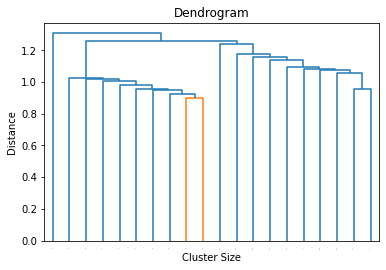

In [36]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### Dimension Reduction using PCA on scaled data

In [37]:
pca2 = PCA()
pca2_df = pca2.fit_transform(tfidf_vectors_scaled)
pca2_df

array([[-1.06400867e+01,  1.08338094e+01,  2.32628281e+01,
        -4.04196914e+00, -5.11997610e+00, -4.65804465e+00,
        -8.26753666e-01, -3.24693527e+00, -1.08337034e-01,
         7.73265878e-01, -1.97979474e+00,  5.32495955e-01,
        -9.05914323e-01, -1.03932479e+00, -4.62157959e-01,
        -5.79087806e-01,  3.53189006e-01,  4.11055679e-01,
         1.23314405e-01,  4.59857910e-15],
       [-7.03036137e+00, -3.46333403e+00, -2.87596552e+00,
         1.21377578e+00,  1.84905489e+00,  3.52760151e-01,
        -7.20089208e-01,  8.04550636e-01,  6.82352664e-01,
        -2.60891852e+00, -5.03119064e+00, -8.54280203e+00,
        -6.57313892e+00, -1.22220208e+01,  1.17309967e+01,
         1.21750531e-01, -7.68814356e-01,  1.66328674e-01,
        -6.10515372e-01,  4.59857910e-15],
       [-7.24171061e+00, -4.58797537e+00, -5.39233045e-01,
         3.87227602e+00,  4.17849693e+00,  2.15469539e+00,
        -7.91302874e+00, -7.61006835e+00,  1.57842151e+01,
         3.64421210e+00,  1.0

In [38]:
pca2_df = pd.DataFrame(pca2_df)
pca2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-10.640087,10.833809,23.262828,-4.041969,-5.119976,-4.658045,-0.826754,-3.246935,-0.108337,0.773266,-1.979795,0.532496,-0.905914,-1.039325,-0.462158,-0.579088,0.353189,0.411056,0.123314,4.598579e-15
1,-7.030361,-3.463334,-2.875966,1.213776,1.849055,0.352760,-0.720089,0.804551,0.682353,-2.608919,-5.031191,-8.542802,-6.573139,-12.222021,11.730997,0.121751,-0.768814,0.166329,-0.610515,4.598579e-15
2,-7.241711,-4.587975,-0.539233,3.872276,4.178497,2.154695,-7.913029,-7.610068,15.784215,3.644212,10.712754,4.678767,0.190433,-0.299623,1.202411,-1.138497,0.029237,0.147209,-0.221102,4.598579e-15
3,-5.863257,0.418789,0.399846,0.047935,2.654367,1.817173,0.584658,6.294997,-8.744185,-15.108798,13.842773,3.802913,-2.550609,0.171804,-0.000817,0.303498,0.342439,0.255899,-0.241763,4.598579e-15
4,-7.697176,-2.518787,0.740179,1.818456,4.134554,4.313200,5.317220,9.731751,-7.405961,18.011776,4.236020,2.967157,-0.677150,-1.066441,0.188668,0.720055,-0.625541,-0.180909,-0.294583,4.598579e-15
5,-5.277398,-2.213030,-2.552465,0.648711,0.781171,0.022983,-0.622376,-1.489497,1.006348,-2.285762,-4.490196,0.324156,1.182986,-2.978633,-9.161952,14.478903,-6.928033,1.113811,-1.173858,4.598579e-15
6,-3.227674,-1.795925,-3.603764,0.134100,-0.281526,-0.523133,0.454987,-0.908078,-0.600337,-0.715906,-2.700304,0.546056,0.531253,-1.533696,-3.266503,-1.097945,2.627694,1.248818,11.120773,4.598579e-15
7,-7.553798,-3.097042,-1.595645,1.944655,2.168738,0.694251,-1.116653,0.806174,0.903233,-0.932913,-5.515563,-5.473428,-10.248797,16.347490,0.657572,-0.786028,-0.868799,0.877852,-0.414712,4.598579e-15
8,-6.682535,-2.074420,-0.101663,0.450994,1.982698,0.775202,0.526486,2.029142,-0.432716,-2.742589,-2.351585,-4.764213,18.582472,5.055117,5.991017,-1.564278,-2.381099,0.974770,-0.394061,4.598579e-15
9,-4.925604,-2.155267,-2.820623,0.401004,0.610217,-0.264325,0.329455,-0.581746,-0.050413,-1.444107,-4.235386,-0.010311,2.027802,-0.992439,-4.687702,0.642746,11.420066,-11.334917,-2.315008,4.598579e-15


In [39]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='Euclidean', linkage='single')

In [40]:
hclust.fit(pca2_df)

AgglomerativeClustering(affinity='Euclidean', linkage='single')

In [41]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [42]:
Z = linkage(pca2_df, 'single')

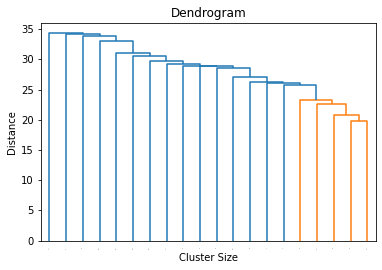

In [43]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### B. Euclidiean Distance with Complete Linkage

In [44]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

hclust.fit(tfidf_vectors_scaled)

AgglomerativeClustering(linkage='complete')

In [45]:
hclust.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [46]:
Z = linkage(tfidf_vectors_scaled, 'complete')

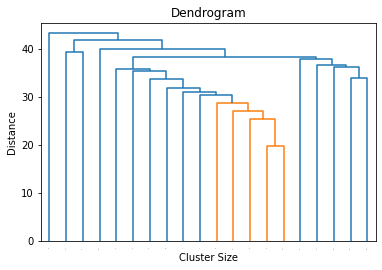

In [47]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### PCA on unscaled data

In [48]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

hclust.fit(pca_df)

AgglomerativeClustering(linkage='complete')

In [49]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [50]:
Z = linkage(pca_df, 'complete')

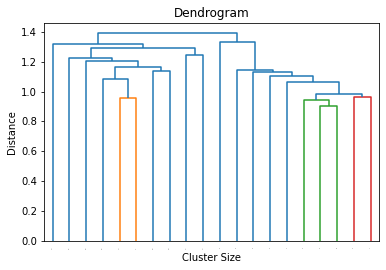

In [51]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### PCA on scaled data

In [52]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

hclust.fit(pca2_df)

AgglomerativeClustering(linkage='complete')

In [53]:
hclust.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [54]:
Z = linkage(pca2_df, 'complete')

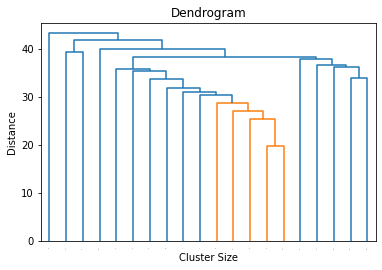

In [55]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### C. Cosine Similarity with Single Linkage

In [56]:
tfidf_vectors

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002871,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.004252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.002091,0.000000,0.000000,0.000000,0.002091,0.000000,0.001972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003794,0.003794,0.000000,0.000000,0.000000
3,0.00923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.007998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061286,0.000000,0.061286,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.007129,0.007129,0.004954,0.000000,0.000000,0.000000,0.000000,0.000000,0.004671,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
tfidf_vectors_scaled

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.210216,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.479643,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.235904,0.0,0.0,0.0,0.153158,0.0,0.122526,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.298069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.470195,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.419087,0.419087,0.558783,0.0,0.0,0.0,0.000000,0.0,0.290227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')

hclust.fit(tfidf_vectors_scaled)

AgglomerativeClustering(affinity='cosine', linkage='single')

In [59]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
Z = linkage(tfidf_vectors_scaled, 'single')

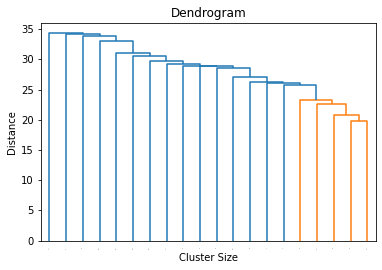

In [61]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### PCA on Unscaled data

In [62]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')

hclust.fit(pca_df)

AgglomerativeClustering(affinity='cosine', linkage='single')

In [63]:
hclust.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [64]:
Z = linkage(pca_df, 'single')

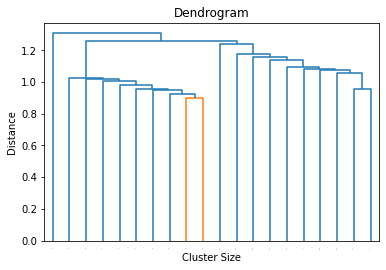

In [65]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### PCA on Scaled data

In [66]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')

hclust.fit(pca2_df)

AgglomerativeClustering(affinity='cosine', linkage='single')

In [67]:
hclust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [68]:
Z = linkage(pca2_df, 'single')

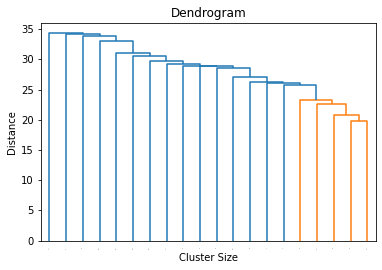

In [69]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### D. Cosine Similarity with Complete Linkage

In [70]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')

hclust.fit(tfidf_vectors_scaled)

AgglomerativeClustering(affinity='cosine', linkage='complete')

In [71]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [72]:
Z = linkage(tfidf_vectors_scaled, 'complete')

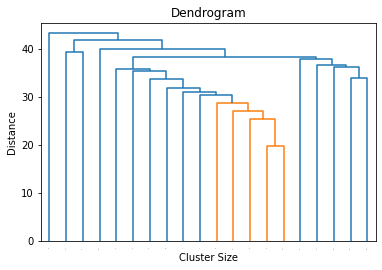

In [73]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### PCA on Unscaled data

In [74]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')

hclust.fit(pca_df)

AgglomerativeClustering(affinity='cosine', linkage='complete')

In [75]:
hclust.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [76]:
Z = linkage(pca_df, 'complete')

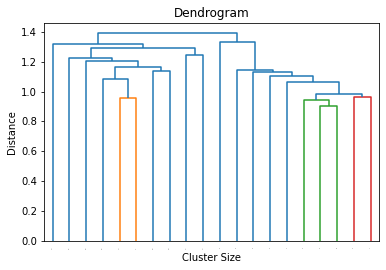

In [77]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### PCA on Scaled data

In [78]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')

hclust.fit(pca2_df)

AgglomerativeClustering(affinity='cosine', linkage='complete')

In [79]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [80]:
Z = linkage(pca2_df, 'complete')

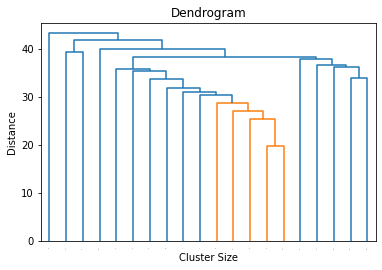

In [81]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

### 5. Bag of Words dataframe using TF (BOW Model)

In [82]:
#The word list
names = cv.get_feature_names()

In [83]:
len(names)

9845

In [84]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 4, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [85]:
#Converting the document-term matrix to a dataframe
DTM = pd.DataFrame(X, columns=names)

In [86]:
DTM.head()

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Scaling

In [87]:
#Passing the values of the dataset to Min-Max-Scaler
DTM_values = DTM.values
min_max_scaler = preprocessing.MinMaxScaler()
DTM_scaled = min_max_scaler.fit_transform(DTM_values)
DTM_scaled = pd.DataFrame(DTM_scaled,
columns=DTM.columns)

In [88]:
DTM_scaled

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.333333,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.333333,0.0,0.0,0.0,0.25,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.50,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.00,0.00,0.000000,0.0,0.0,1.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.25,0.25,0.333333,0.0,0.0,0.0,0.00,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='Euclidean', linkage='complete')

hclust.fit(DTM_scaled)

AgglomerativeClustering(affinity='Euclidean', linkage='complete')

In [90]:
hclust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

#### Plotting Dendrogram with labels and Justify the result

In [91]:
Z = linkage(DTM_scaled, 'complete')

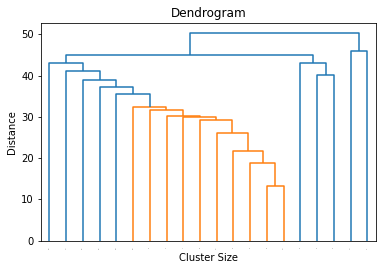

In [92]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [93]:
# Calculating variance
np.sum(DTM.var(ddof=1)) 

106096.02368421052

In [94]:
# Making an object for Principal Component Analysis
pca_DTM = PCA()

In [95]:
# Fit_Transform scaled data created before by PCA
DTM_scaled_pc = pca_DTM.fit_transform(DTM)

In [96]:
# Calculating the Variation
var_DTM = pca_DTM.explained_variance_ratio_ * 100
var_DTM = pd.DataFrame(var_DTM, index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20'])
var_DTM

,0
pca1,3.457955e+01
pca2,1.837245e+01
pca3,8.792418e+00
pca4,5.934671e+00
pca5,5.015178e+00
pca6,4.629044e+00
pca7,4.243462e+00
pca8,3.740811e+00
pca9,3.201130e+00
pca10,2.401173e+00


In [97]:
variance_DTM = pca_DTM.explained_variance_
variance_DTM = pd.DataFrame(variance_DTM, index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20'])
variance_DTM

,0
pca1,3.668753e+04
pca2,1.949244e+04
pca3,9.328406e+03
pca4,6.296450e+03
pca5,5.320905e+03
pca6,4.911232e+03
pca7,4.502145e+03
pca8,3.968851e+03
pca9,3.396271e+03
pca10,2.547549e+03


#### Using Unscale PCA

In [98]:
pca1 = PCA()
pca_df = pca1.fit_transform(DTM)
pca_df

array([[-1.20188327e+02,  1.85163821e+02,  2.36606994e-01,
         2.95326794e+00, -2.85144586e+01,  4.53970781e+01,
        -1.52173208e+02,  3.31984861e+01, -1.70286455e+02,
         2.14317777e+01,  1.31494078e+01, -1.35147958e+00,
         1.64930451e+01, -3.20209915e+00, -1.68890819e+01,
        -2.49692103e+01, -4.69521011e+00, -8.20350550e-01,
         8.69283132e-01,  5.09463750e-14],
       [-1.29059488e+02,  1.79610957e+01, -2.04886492e+01,
         2.21494207e+01, -1.92124825e+01, -2.00224375e+01,
         1.77047584e+01, -1.19463315e+01, -7.60594782e-01,
        -2.68628481e+01, -6.97924892e+01,  1.12342571e+02,
        -3.09731323e+01, -8.25361673e+01, -3.81782343e+01,
         1.81293073e+01, -3.55807812e+00, -8.95410383e-01,
         4.46142829e-02,  5.09463750e-14],
       [-1.29655823e+02,  3.80233282e+02,  5.56514483e+01,
        -6.50917916e+01,  8.00325614e+01, -9.02493069e+00,
         1.76282667e+02, -2.35602129e+01, -2.03118561e+01,
         6.76689872e+00,  1.3

In [99]:
pca_df = pd.DataFrame(pca_df)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-120.188327,185.163821,0.236607,2.953268,-28.514459,45.397078,-152.173208,33.198486,-170.286455,21.431778,13.149408,-1.351480,16.493045,-3.202099,-16.889082,-24.969210,-4.695210,-0.820351,0.869283,5.094637e-14
1,-129.059488,17.961096,-20.488649,22.149421,-19.212483,-20.022438,17.704758,-11.946331,-0.760595,-26.862848,-69.792489,112.342571,-30.973132,-82.536167,-38.178234,18.129307,-3.558078,-0.895410,0.044614,5.094637e-14
2,-129.655823,380.233282,55.651448,-65.091792,80.032561,-9.024931,176.282667,-23.560213,-20.311856,6.766899,13.686546,-21.490512,14.916959,-8.851774,0.093367,-11.495599,-5.186871,-1.451263,1.017720,5.094637e-14
3,-136.545999,-16.109618,-31.370625,27.485046,-29.867161,-5.340911,-19.739085,-4.617498,-6.244879,-21.455286,-9.149385,-37.978054,-7.368958,-64.396059,122.951552,16.960064,-0.920545,-0.797840,-0.889403,5.094637e-14
4,-142.882791,220.283727,9.258437,21.170016,-26.537340,22.837872,-116.451802,37.630229,185.214503,16.545441,17.532416,-11.310023,17.710874,-10.857291,-16.645797,-18.639444,1.886628,-0.967560,0.585678,5.094637e-14
5,-125.841459,-64.351171,-26.560343,23.731583,-18.288790,-28.731846,22.745162,-21.775566,-14.751654,-21.331968,1.581220,-23.805812,-8.272246,2.500960,-18.190683,-20.591749,82.410930,2.052263,-4.697339,5.094637e-14
6,-138.047642,-157.187107,-40.542377,37.072132,-27.420252,-36.457060,29.209831,-23.458230,0.668025,-20.871320,5.188690,-32.663622,-1.642548,0.555064,-19.317088,-35.161303,-15.255696,-7.423610,36.619114,5.094637e-14
7,-119.574233,61.491463,-6.579925,16.118051,-6.598660,-10.144855,-3.802924,-7.689726,9.960202,-17.059586,-38.530703,71.634988,-45.350837,118.084509,49.780090,-17.595624,-2.285325,-2.090838,0.399646,5.094637e-14
8,-131.499901,39.398178,-14.704107,24.665095,-18.606085,-16.247138,-18.015637,-15.915534,-8.226942,-6.759342,9.182682,-54.556170,-46.896976,32.719704,-34.780271,109.228649,-5.000438,-10.221294,0.260654,5.094637e-14
9,-130.512417,-89.829351,-31.269272,30.547978,-23.191552,-29.605644,19.336983,-18.848813,0.483483,-18.418871,4.750867,-29.573379,-7.273917,7.587930,-19.699755,-14.793396,-24.333544,58.954935,-11.729354,5.094637e-14


In [100]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

hclust.fit(pca_df)

AgglomerativeClustering(linkage='complete')

In [101]:
hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [102]:
Z = linkage(pca_df, 'complete')

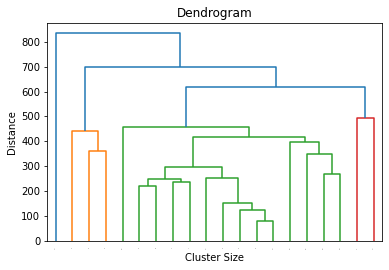

In [103]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### Using Scaled PCA

In [104]:
DTM_scaled

,00,01,02,03,038,0385121857,039,04,049,05,...,ɡaˈuʃu,ʁonawˈdʒĩɲu,ʁɔˈnaɫdu,ʃi,ʃin,ʋɪˈɾɑːʈ,ˈkoːɦli,ˈlejt,ˈmesi,ˈɛdsõw
0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.333333,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.333333,0.0,0.0,0.0,0.25,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.50,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.00,0.00,0.000000,0.0,0.0,1.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.25,0.25,0.333333,0.0,0.0,0.0,0.00,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
pca2 = PCA()
pca2_df = pca2.fit_transform(DTM_scaled)
pca2_df

array([[-4.37877404e+00,  2.16069621e+01,  1.50971889e+01,
         1.19080825e+01, -9.90969190e+00, -1.72357787e+00,
         4.04389564e+00, -3.51285311e+00, -1.60838748e+00,
        -1.78672282e-01, -1.57609021e+00,  9.02868194e-01,
        -4.15602688e-01, -7.47870056e-02,  9.07097310e-01,
        -2.67896353e-01, -4.68713994e-01,  2.79906864e-01,
         9.99062509e-02,  4.39842897e-15],
       [-6.59042571e+00,  5.26015217e-01, -2.73827706e+00,
        -2.79705050e+00,  4.26841622e-01, -1.53075612e+00,
        -2.74046757e+00, -1.20123107e+00, -3.81694587e+00,
        -2.57819726e+00, -4.11480854e+00, -1.11255595e+01,
        -1.44396361e+01, -6.60996357e+00, -2.58902936e+00,
         1.61601243e+00,  8.17808185e-01, -1.57536641e-01,
        -2.28202363e-01,  4.39842897e-15],
       [-5.15373296e+00,  1.27840581e+01, -6.73546900e-01,
        -1.12165852e+01,  1.64064973e+01,  1.27895340e+01,
         1.01119319e+01,  2.79377713e+00, -3.86973207e-01,
         3.17531094e+00,  3.1

In [106]:
pca2_df = pd.DataFrame(pca2_df)
pca2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.378774,21.606962,15.097189,11.908083,-9.909692,-1.723578,4.043896,-3.512853,-1.608387,-0.178672,-1.576090,0.902868,-0.415603,-0.074787,0.907097,-0.267896,-0.468714,0.279907,0.099906,4.398429e-15
1,-6.590426,0.526015,-2.738277,-2.797050,0.426842,-1.530756,-2.740468,-1.201231,-3.816946,-2.578197,-4.114809,-11.125559,-14.439636,-6.609964,-2.589029,1.616012,0.817808,-0.157537,-0.228202,4.398429e-15
2,-5.153733,12.784058,-0.673547,-11.216585,16.406497,12.789534,10.111932,2.793777,-0.386973,3.175311,0.313931,2.772171,-0.717248,-0.122753,0.706811,0.382903,-0.664445,0.238417,0.114889,4.398429e-15
3,-4.944903,0.337895,-1.410547,0.440857,-0.506510,-2.324238,-2.758294,-0.654448,-3.337073,-2.154414,20.162890,2.544544,-0.172652,-5.900310,-1.149874,0.735834,0.526986,-0.131742,-0.296196,4.398429e-15
4,-5.777013,6.459520,-1.375456,-2.705055,1.729607,-4.238660,-13.806448,3.528658,20.231956,3.834866,-0.767996,1.937603,-0.707833,-0.380869,0.929267,0.198687,0.190224,-0.020811,-0.035025,4.398429e-15
5,-6.149755,-1.046001,-2.290085,-1.525281,0.103365,-1.311657,-1.260027,-0.613709,-3.560660,-1.746410,-1.381912,1.113050,0.530775,3.308568,3.873440,-10.946600,10.622721,-0.532745,-0.746804,4.398429e-15
6,-6.063080,-3.291848,-2.737002,-0.860557,-0.978043,-2.001073,-1.413468,-0.746495,-2.798241,-1.143168,-0.643109,1.139777,-0.042994,1.939323,1.814837,-2.688475,-3.127454,1.686767,6.948934,4.398429e-15
7,-6.559647,1.683916,-2.201557,-2.669230,1.247387,-1.460999,-2.594268,-0.786084,-2.832204,-2.725344,-4.359671,-8.555883,15.540744,-7.877924,-1.621789,2.105394,0.444683,0.099146,-0.185614,4.398429e-15
8,-5.906560,1.152678,-1.938016,-1.385864,-0.275968,-1.525290,-2.259816,-0.304034,-2.567479,-1.743910,1.053340,-1.335427,1.155411,13.847317,-12.473316,4.933895,1.655262,-0.156413,-0.303726,4.398429e-15
9,-6.004246,-2.112354,-2.590633,-1.050188,-0.602028,-1.882053,-1.660089,-0.652805,-3.186819,-1.342537,-1.193573,0.965765,0.230713,2.846518,2.231472,-5.155389,-8.424141,-8.715202,-1.739014,4.398429e-15


In [107]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

hclust.fit(pca2_df)

AgglomerativeClustering(linkage='complete')

In [108]:
hclust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [109]:
Z = linkage(pca2_df, 'complete')

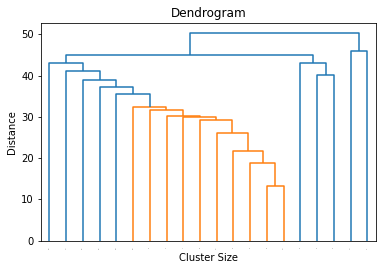

In [110]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

### Conclusion

- on comparing the distaces using euclidean & Cosine method,
    - The model with cosine with complete linkage on unscaled data of PCA gives the proper classification of 10/10 for both cricketr and football 